_Get Out_ has been one of the most talked about films in 2017 and as of April 2017 [was the highest grossing debut film based on an original screenplay in history](http://www.thefader.com/2017/04/04/get-out-original-screenplay-record). I wanted to find out how _Get Out_ ranked amongst other 2017 American films and to find out which film has earned the most revenue in 2017.

[The Movie DB (TMDB)](https://www.themoviedb.org/) has a free API to programmatically access information about movies.

In order to get started with TMDB:
  1. [Create a free account](https://www.themoviedb.org/account/signup)
  2. Check your e-mail to verify your account.
  3. Visit the [API Settings page](https://www.themoviedb.org/settings/api) in your Account Settings and request an api key 
  4. You should now have an API key and be ready to go!
  

In [603]:
import config # to hide API keys
import requests # to make API calls
import locale # to format currency as USD 
locale.setlocale( locale.LC_ALL, '' )

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # to format currency on charts axis

In [538]:
api_key = config.tmdb_api_key # get API key from config.py file

# What are the highest earning American films of 2017?

In order to get the highest earning films from TMDB an API request needs to be constructed to return films with a `primary_release_year` of 2017 sorted in descending order by revenue.

### API Call

In [626]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&primary_release_year=2017&sort_by=revenue.desc')

In [627]:
highest_revenue = response.json() # store parsed json response

In [628]:
# uncomment the next line to get a peek at the highest_revenue json structure
# highest_revenue

In [629]:
highest_revenue_films = highest_revenue['results']

### Storing Data

Create a dataframe to store the film and revenue information that is returned from the API call.

In [631]:
columns = ['film', 'revenue']

df = pandas.DataFrame(columns=columns)

Looping through the data and adding it to the dataframe

In [632]:
# for each of the highest revenue films make an api call for that specific movie to return the budget and revenue
for film in highest_revenue_films:
    # print(film['title'])
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    #print(locale.currency(film_revenue['revenue'], grouping=True ))
    df.loc[len(df)]=[film['title'],film_revenue['revenue']] # store title and revenue in our dataframe
    


Below is what the dataframe `head` (top 5 lines) looks like after iterating through the films our API call returned.

In [634]:
df.head()

,film,revenue
0,Beauty and the Beast,1221782049
1,The Fate of the Furious,1212583865
2,Guardians of the Galaxy Vol. 2,744784722
3,Logan,608578340
4,Kong: Skull Island,565151307


Now it's time to get to plotting

In [636]:
matplotlib.style.use('ggplot')

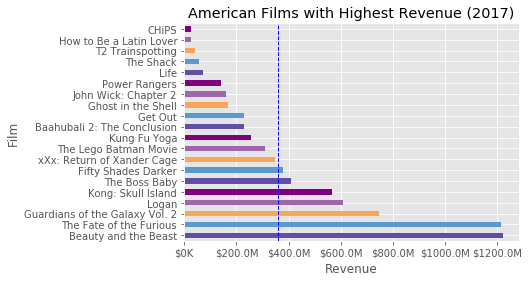

In [640]:
fig, ax = plt.subplots()
df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=df['film'], ax=ax)

#format xaxis in terms of currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

avg = df['revenue'].mean()

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

ax.set(title='American Films with Highest Revenue (2017)', xlabel='Revenue', ylabel='Film')

# What are the highest earning American films of all time?

In [641]:
response = requests.get('https://api.themoviedb.org/3/discover/movie?api_key=' +  api_key + '&sort_by=revenue.desc')
highest_revenue_ever = response.json()
highest_revenue_films_ever = highest_revenue_ever['results']

columns = ['film', 'revenue', 'budget', 'release_date']
highest_revenue_ever_df = pandas.DataFrame(columns=columns)

for film in highest_revenue_films_ever:
    # print(film['title'])
   
    film_revenue = requests.get('https://api.themoviedb.org/3/movie/'+ str(film['id']) +'?api_key='+ api_key+'&language=en-US')
    film_revenue = film_revenue.json()
    # print(film_revenue)

    # print(locale.currency(film_revenue['revenue'], grouping=True ))
    
    # Lord of the Rings duplicate w/ bad data was being returned  https://www.themoviedb.org/movie/454499-the-lord-of-the-rings
    # It's budget was $281 which is way too low for a top-earning film. Therefore in order to be added to dataframe the film 
    # budget must be greater than $281.
    
    if film_revenue['budget'] > 281:
        # print(film_revenue['budget'])
        highest_revenue_ever_df.loc[len(highest_revenue_ever_df)]=[film['title'],film_revenue['revenue'], (film_revenue['budget'] * -1), film_revenue['release_date']]

In [593]:
highest_revenue_ever_df.head()

,film,revenue,budget,release_date
0,Avatar,2781505847,-237000000,2009-12-10
1,Star Wars: The Force Awakens,2068223624,-245000000,2015-12-15
2,Titanic,1845034188,-200000000,1997-11-18
3,The Avengers,1519557910,-220000000,2012-04-25
4,Jurassic World,1513528810,-150000000,2015-06-09


Calculate the gross-profit by subtracting total revenue from amount spent. Earlier I made the budget values negative therefore I am adding the revenue to the (negative) budget to get the gross profit. 

In [643]:
highest_revenue_ever_df['gross'] = highest_revenue_ever_df['revenue'] + highest_revenue_ever_df['budget']

What does the dataframe look like now?

In [645]:
highest_revenue_ever_df.head()

,film,revenue,budget,release_date,gross
0,Avatar,2781505847,-237000000,2009-12-10,2544505847
1,Star Wars: The Force Awakens,2068223624,-245000000,2015-12-15,1823223624
2,Titanic,1845034188,-200000000,1997-11-18,1645034188
3,The Avengers,1519557910,-220000000,2012-04-25,1299557910
4,Jurassic World,1513528810,-150000000,2015-06-09,1363528810


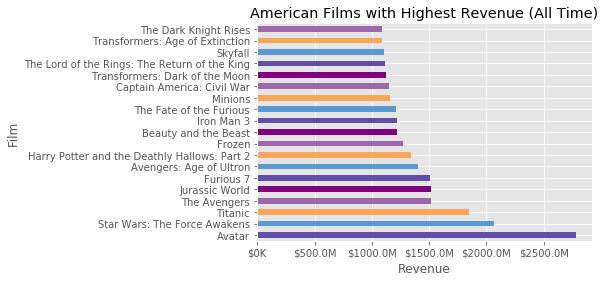

In [646]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind="barh", y='revenue', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=highest_revenue_ever_df['film'], ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)
ax.set(title='American Films with Highest Revenue (All Time)', xlabel='Revenue', ylabel='Film')

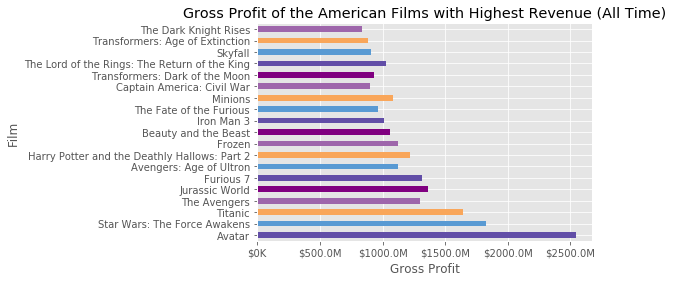

In [647]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind="barh", y='gross', color = ['#624ea7', '#599ad3', '#f9a65a', '#9e66ab', 'purple'], x=highest_revenue_ever_df['film'], ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)
ax.set(title='Gross Profit of the American Films with Highest Revenue (All Time)', xlabel='Gross Profit', ylabel='Film')

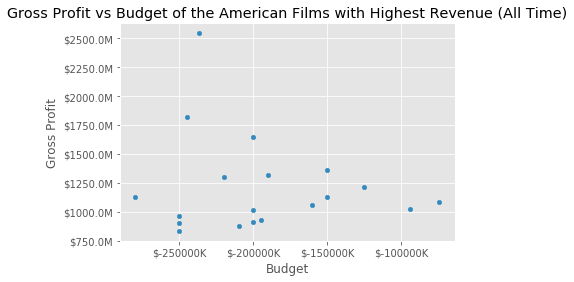

In [648]:
fig, ax = plt.subplots()
highest_revenue_ever_df.plot(kind='scatter', y='gross', x='budget', ax=ax)
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.yaxis.set_major_formatter(formatter)
ax.set(title='Gross Profit vs Budget of the American Films with Highest Revenue (All Time)', xlabel='Budget', ylabel='Gross Profit')


In [649]:
# Adding release year to dataframe
highest_revenue_ever_df['year'] = pd.DatetimeIndex(highest_revenue_ever_df['release_date']).year
# highest_revenue_ever_df

_Cover photo is Chris Washington, played by Daniel Kaluuya, from Get Out.   Universal Pictures_